In [1]:
# imports
from commstools.core import Signal
from commstools.impairments import apply_awgn

from commstools.mapping import gray_constellation
from commstools.logger import set_log_level
from commstools.plotting import filter_response, ideal_constellation

set_log_level("WARNING")


2026-02-18 12:43:59 [INFO] [commstools/backend.py] CuPy is available and functional, defaulting Signals to GPU.


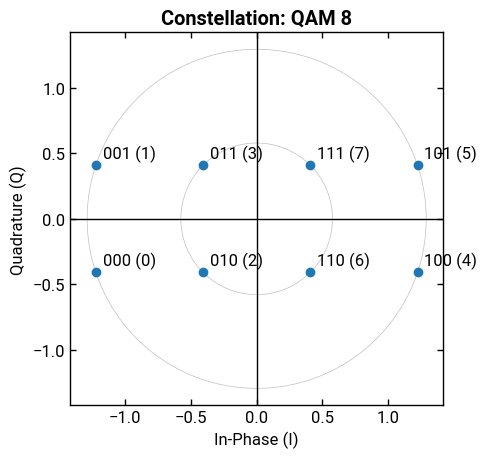

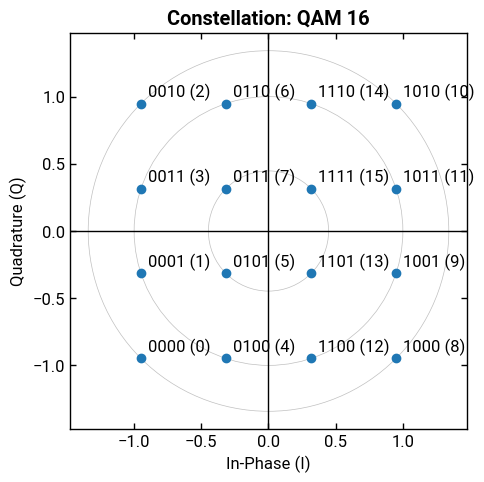

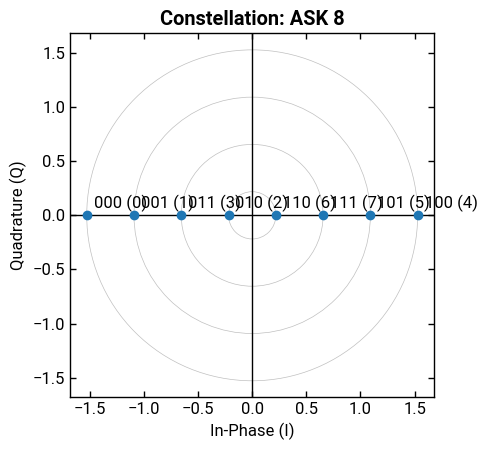

In [2]:
ideal_constellation(modulation="qam", order=8, show=True)
ideal_constellation(modulation="qam", order=16, show=True)
ideal_constellation(modulation="ask", order=8, show=True)


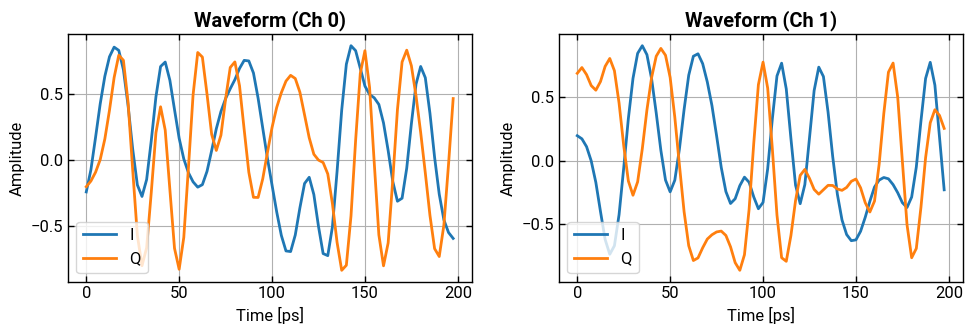

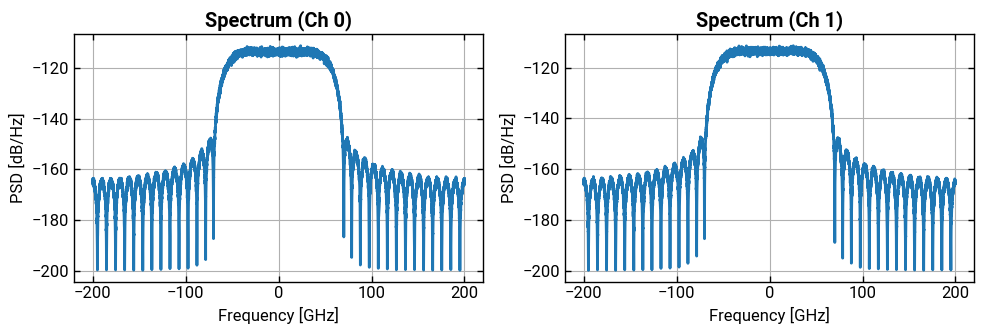

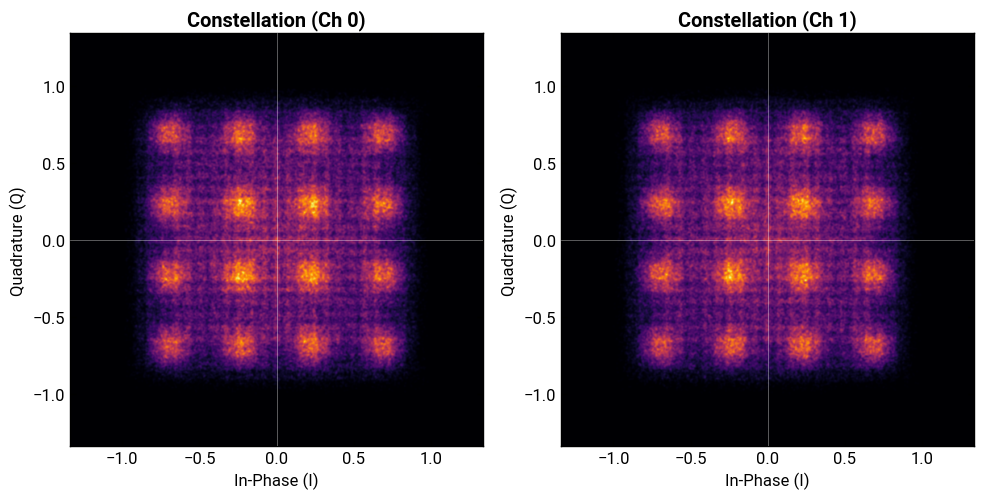

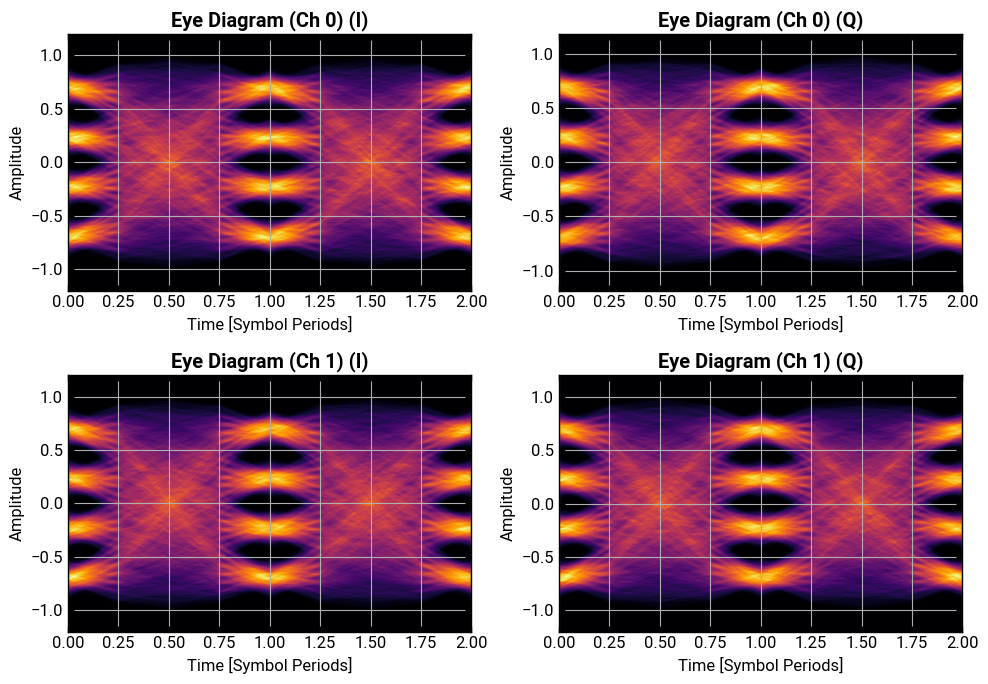

0.2953605


In [3]:
import numpy as np

symbol_rate = 100e9
sampling_rate = 400e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = Signal.qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=43,
    num_streams=2,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_constellation(show=True, overlay_ideal=False, bins=512)
sig_4qam.plot_eye(show=True)

print(np.var(sig_4qam.samples**2))


In [4]:
sig_4qam.source_symbols.shape


(2, 100000)

In [5]:
from commstools.helpers import rms

print(rms(sig_4qam.source_symbols, axis=-1, keepdims=True))


[[1.       ]
 [1.0000001]]


In [6]:
a = gray_constellation("qam", 16)


In [7]:

# plt.plot(sig_4qam.source_symbols[0, :100].get())

sig_4qam.source_symbols[0].max()


array(0.95000285+0.95000285j, dtype=complex64)

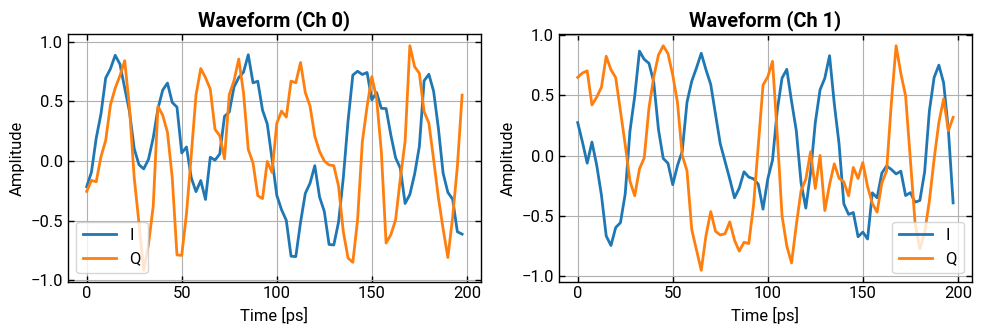

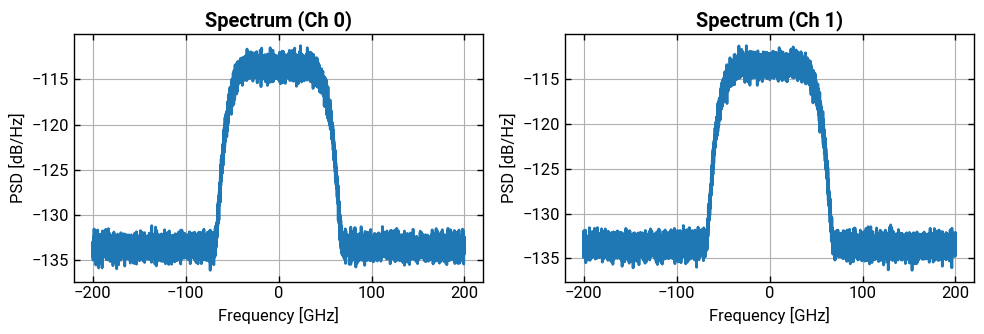

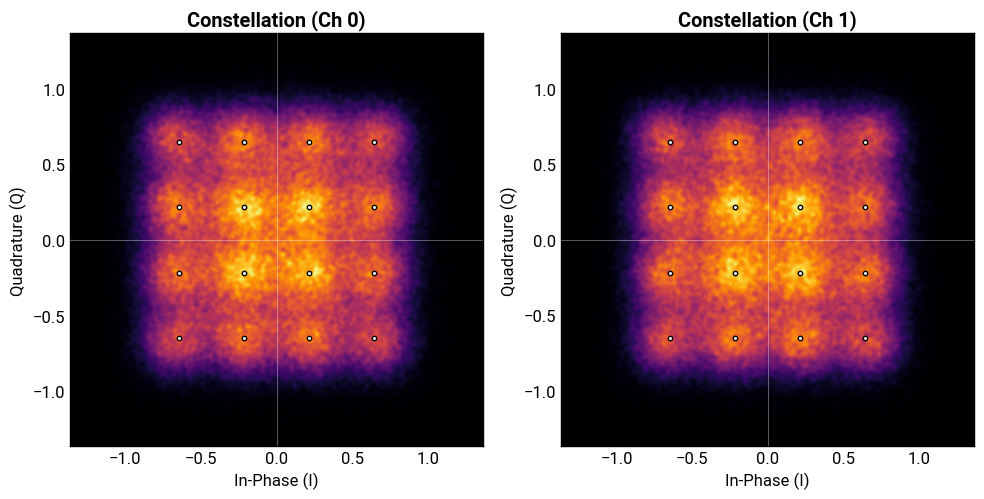

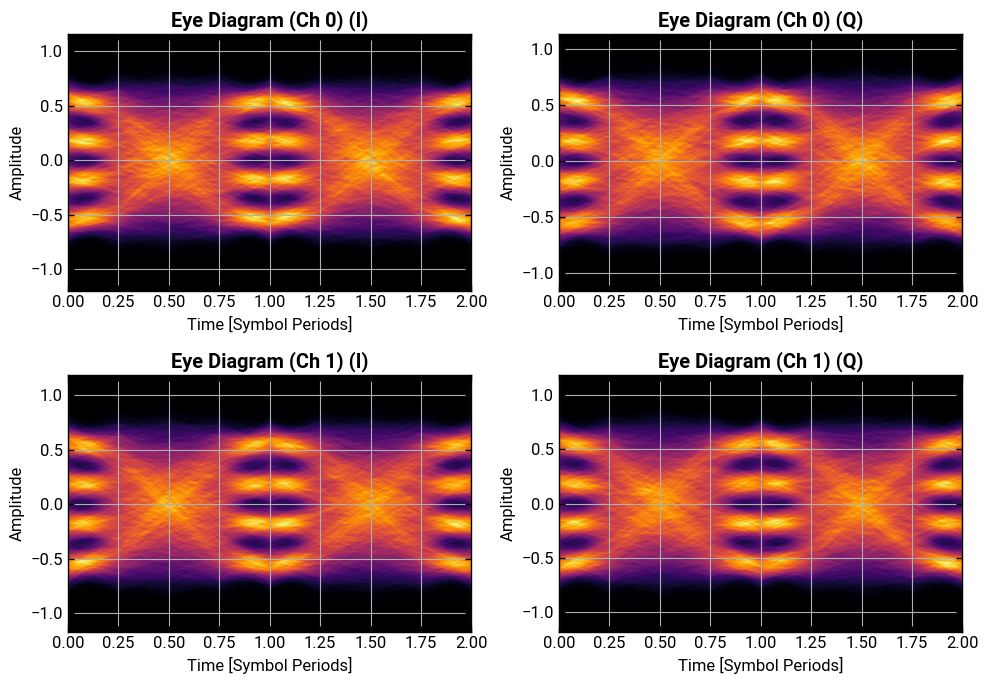

0.3281309


In [8]:
sig_4qam_n = apply_awgn(sig_4qam, esn0_db=20)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(show=True, overlay_ideal=True, bins=256)
sig_4qam_n.plot_eye(show=True)

print(np.var(sig_4qam_n.samples**2))


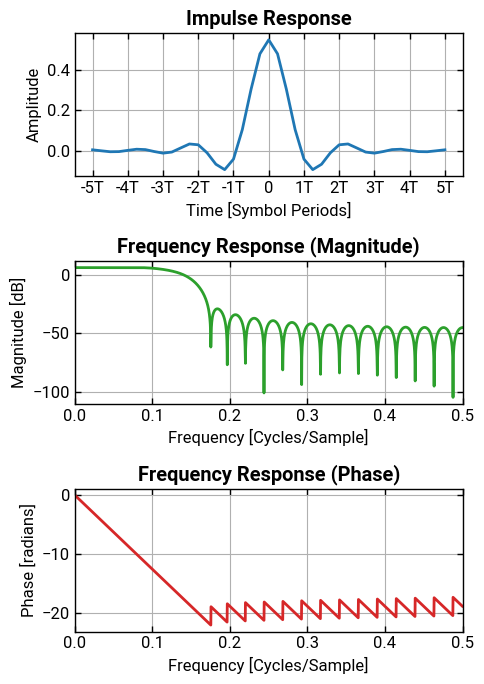

In [9]:
rrc_filter = sig_4qam_n.shaping_filter_taps()
filter_response(rrc_filter, sps=sps, show=True)


In [10]:
sig_4qam_n.matched_filter()


Signal(samples=array([[-0.20439014-0.3133819j , -0.03312103-0.37314777j,
         0.31573285-0.30067721j, ..., -1.32824852-0.77383138j,
        -1.06111786-0.44445088j, -0.61996279-0.21376219j],
       [ 0.23942221+0.83463919j,  0.28698887+1.05433931j,
         0.23141108+1.15676616j, ...,  1.03379624-1.05421326j,
         0.70072894-0.76016768j,  0.34518268-0.45299847j]],
      shape=(2, 400000)), sampling_rate=400000000000.0, symbol_rate=100000000000.0, mod_scheme='QAM', mod_order=16, mod_unipolar=False, mod_rz=False, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-0.31666762-0.31666762j,  0.95000285+0.31666762j,
         0.95000285+0.95000285j, ..., -0.95000285+0.95000285j,
         0.31666762-0.95000285j, -0.95000285-0.95000285j],
       [ 0.31639612+0.9491885j , -0.31639612+0.9491885j ,
        -0.9491885 +0.9491885j , ..., -0.31639612+0.9491885j ,
         0.31639612-0.31639612j,  0.9491885 -0.94

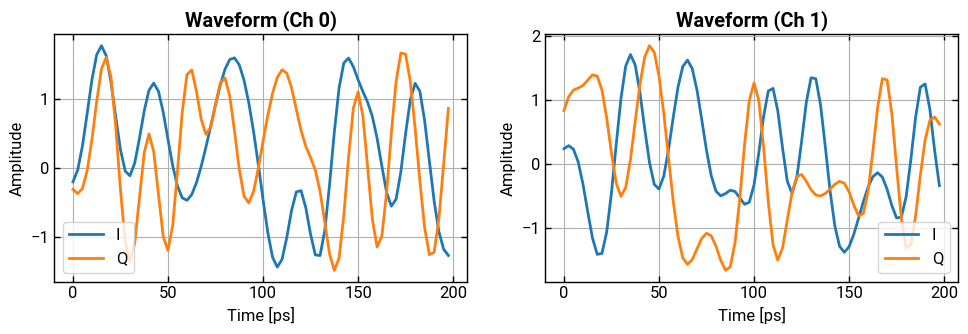

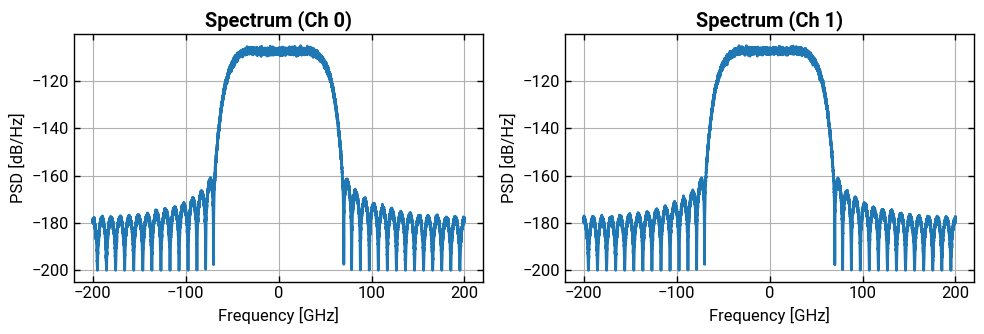

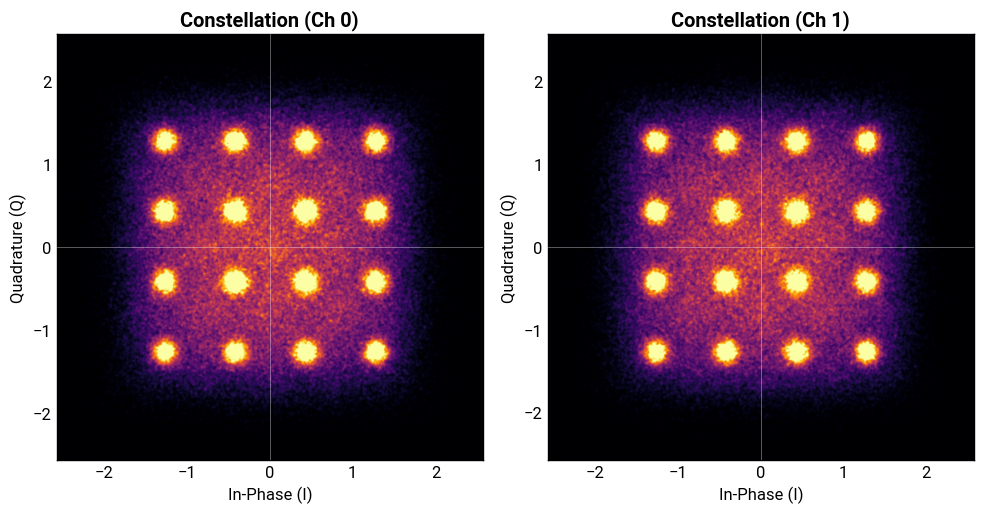

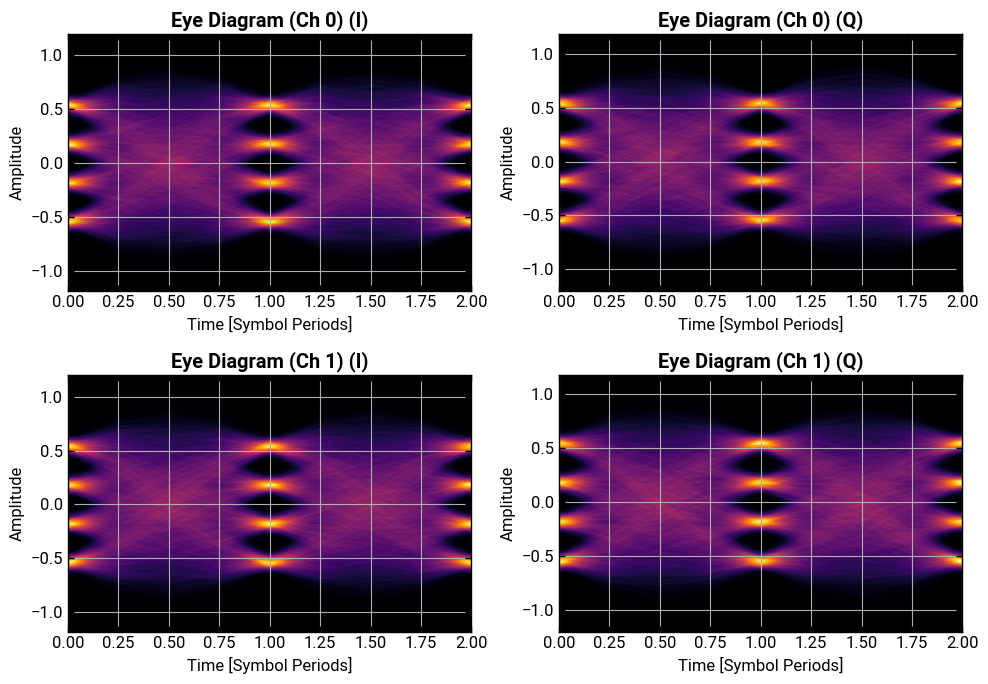

4.0853500883479175


In [11]:
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(
    show=True, overlay_ideal=False, bins=512, vmin=0, vmax=0.5
)
sig_4qam_n.plot_eye(show=True)

print(np.var(sig_4qam_n.samples**2))


In [12]:
sig_4qam_n.print_info()


Property         Value
0             Spectral Domain      BASEBAND
1             Physical Domain           DIG
2   Modulation (Scheme/Order)      QAM / 16
3                 Symbol Rate  100.00 GBaud
4                    Bit Rate   400.00 Gbps
5               Sampling Rate    400.00 GHz
6          Samples Per Symbol          4.00
7                 Pulse Shape           RRC
8                    Duration       1.00 µs
9            Center Frequency       0.00 Hz
10       Digital Freq. Offset       0.00 Hz
11                    Backend           GPU
12              Configuration     MIMO (2x)
13              Samples Shape   (2, 400000)

In [13]:
sig_4qam_n.decimate_to_symbol_rate()


Signal(samples=array([[-0.20439014-0.3133819j ,  1.27388363+0.40978061j,
         1.24082627+1.31313616j, ..., -1.32034623+1.15697092j,
         0.58411836-1.4074572j , -1.26130182-1.16713406j],
       [ 0.23942221+0.83463919j, -0.3110923 +1.22917152j,
        -1.39975226+1.15699781j, ..., -0.35933191+1.27433664j,
         0.31670172-0.54564923j,  1.24058416-1.26457192j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, mod_scheme='QAM', mod_order=16, mod_unipolar=False, mod_rz=False, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-0.31666762-0.31666762j,  0.95000285+0.31666762j,
         0.95000285+0.95000285j, ..., -0.95000285+0.95000285j,
         0.31666762-0.95000285j, -0.95000285-0.95000285j],
       [ 0.31639612+0.9491885j , -0.31639612+0.9491885j ,
        -0.9491885 +0.9491885j , ..., -0.31639612+0.9491885j ,
         0.31639612-0.31639612j,  0.9491885 -0.94

In [14]:
sig_4qam_n.print_info()
print(np.var(sig_4qam_n.samples**2))


Property         Value
0             Spectral Domain      BASEBAND
1             Physical Domain           DIG
2   Modulation (Scheme/Order)      QAM / 16
3                 Symbol Rate  100.00 GBaud
4                    Bit Rate   400.00 Gbps
5               Sampling Rate    100.00 GHz
6          Samples Per Symbol          1.00
7                 Pulse Shape           RRC
8                    Duration       1.00 µs
9            Center Frequency       0.00 Hz
10       Digital Freq. Offset       0.00 Hz
11                    Backend           GPU
12              Configuration     MIMO (2x)
13              Samples Shape   (2, 100000)

4.3663914251171025


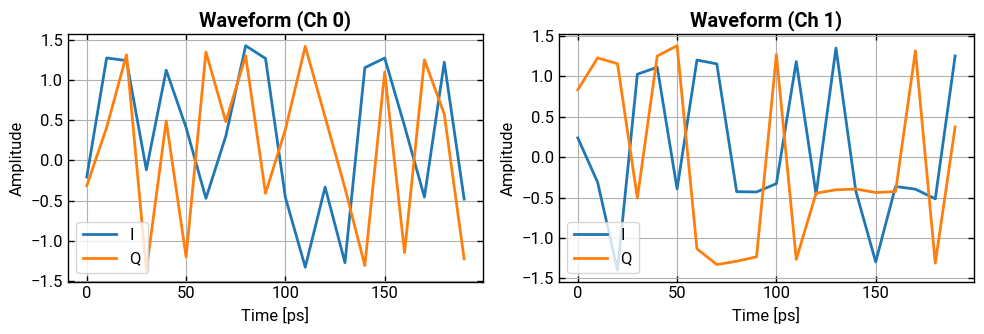

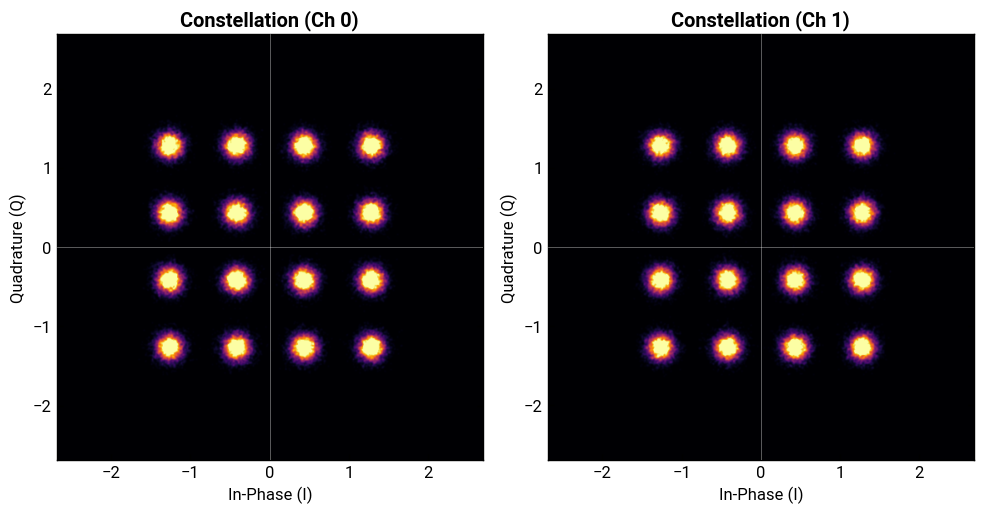

In [15]:
sig_4qam_n.plot_symbols(show=True, num_symbols=20)
sig_4qam_n.plot_constellation(
    show=True, overlay_ideal=False, bins=512, vmin=0, vmax=0.5
)


In [16]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.spectral_domain = "PASSBAND"
sig_tmp.physical_domain = "OPT"
sig_tmp.center_frequency = 193.4144e12


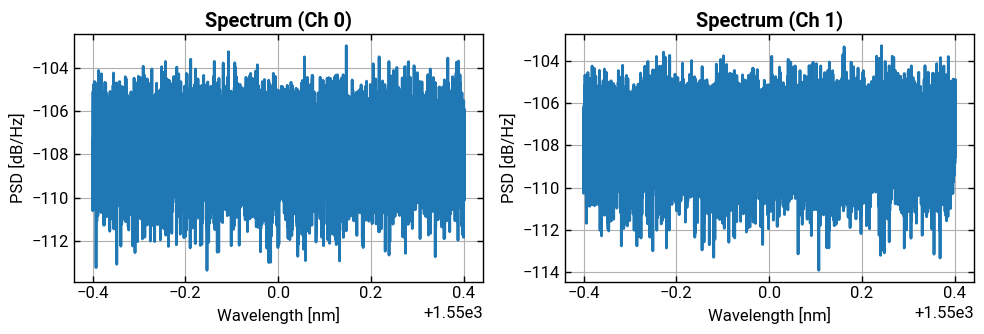

Property         Value
0             Spectral Domain      PASSBAND
1             Physical Domain           OPT
2   Modulation (Scheme/Order)      QAM / 16
3                 Symbol Rate  100.00 GBaud
4                    Bit Rate   400.00 Gbps
5               Sampling Rate    100.00 GHz
6          Samples Per Symbol          1.00
7                 Pulse Shape           RRC
8                    Duration       1.00 µs
9            Center Frequency    193.41 THz
10       Digital Freq. Offset       0.00 Hz
11                    Backend           GPU
12              Configuration     MIMO (2x)
13              Samples Shape   (2, 100000)

In [17]:
sig_tmp.plot_psd(show=True, x_axis="wavelength", nperseg=2**14)
sig_tmp.print_info()


In [18]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.shift_frequency(30000e6)
# sig_4qam_n.resample(sps_out=2)


Signal(samples=array([[-0.20439014-0.3133819j , -0.78337621+1.08490615j,
        -0.23200747-1.79168885j, ..., -1.74823298+0.15992909j,
         0.35472091+1.48199295j, -0.72024675+1.56023358j],
       [ 0.23942221+0.83463919j, -1.07287878-0.67570125j,
         1.81248962-0.11327716j, ..., -1.0397419 +0.81975j   ,
         0.0645075 +0.6275921j , -1.58604096-0.78909144j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, mod_scheme='QAM', mod_order=16, mod_unipolar=False, mod_rz=False, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-0.31666762-0.31666762j,  0.95000285+0.31666762j,
         0.95000285+0.95000285j, ..., -0.95000285+0.95000285j,
         0.31666762-0.95000285j, -0.95000285-0.95000285j],
       [ 0.31639612+0.9491885j , -0.31639612+0.9491885j ,
        -0.9491885 +0.9491885j , ..., -0.31639612+0.9491885j ,
         0.31639612-0.31639612j,  0.9491885 -0.94

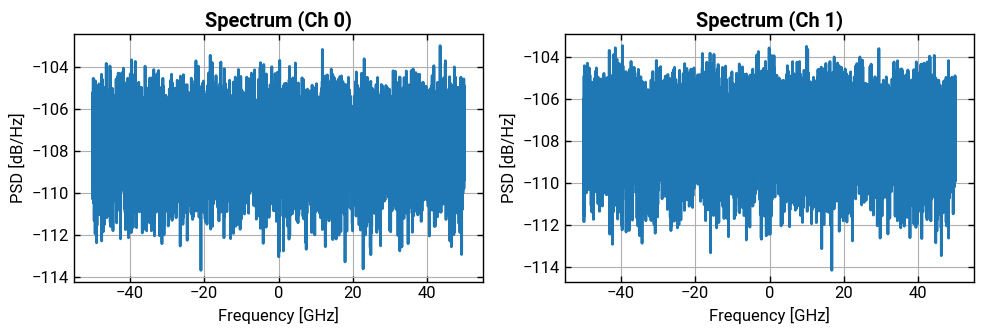

In [19]:
sig_tmp.plot_psd(show=True, nperseg=2**14)


In [20]:
sig_tmp.print_info()


Property         Value
0             Spectral Domain      BASEBAND
1             Physical Domain           DIG
2   Modulation (Scheme/Order)      QAM / 16
3                 Symbol Rate  100.00 GBaud
4                    Bit Rate   400.00 Gbps
5               Sampling Rate    100.00 GHz
6          Samples Per Symbol          1.00
7                 Pulse Shape           RRC
8                    Duration       1.00 µs
9            Center Frequency       0.00 Hz
10       Digital Freq. Offset     30.00 GHz
11                    Backend           GPU
12              Configuration     MIMO (2x)
13              Samples Shape   (2, 100000)

In [21]:
import numpy as np

print(np.var(sig_4qam.samples[0]))
print(np.var(sig_4qam.samples[0].real))
print(np.var(sig_4qam.samples[0].imag))


0.44768375
0.224081
0.22360271


In [22]:
np.vdot(sig_4qam.samples[0], sig_4qam.samples[0]).real / sig_4qam.samples[0].shape[0]


array(0.44769434)

In [23]:
np.dot(sig_4qam.samples[0], sig_4qam.samples[0])


array(187.0856+109.83606j, dtype=complex64)

In [24]:
sig_4qam.samples[0].shape


(400000,)

In [25]:
gray_constellation(modulation="qam", order=64).max()


np.complex128(1.0801234497346435+1.0801234497346435j)